**Diabetes Progression Prediction Using Machine Learning**

This notebook explores multiple regression models to predict disease progression one year after baseline using the Scikit-learn Diabetes dataset.

**Problem Framing**

The objective of this project is to predict the progression of diabetes one year after the baseline using patient health metrics.

Target Variable: 'Disease progression' — a quantitative measure.
Goal: Develop a predictive regression model to help physicians identify patients at risk of rapid disease progression. This enables early intervention and personalized treatment planning.

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp313-cp313-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Load the dataset
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset with DataFrame output
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Preview the dataset
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**Data Preprocessing Overview**

Before model building, it's crucial to:

Check for missing values
Understand data distributions
Ensure correct data types
Apply feature scaling
We'll use 'StandardScaler' to normalize the input features. This ensures fair contribution from all features during training.

In [3]:
#Apply Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic statistics
print(df.describe())

# Data types
print("\nData types:\n", df.dtypes)

# Scaling features
from sklearn.preprocessing import StandardScaler

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preview first few rows
print(X_scaled[:5])

Missing values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02

**Exploratory Data Analysis (EDA)**

In this section, we explore the dataset to understand the distributions, relationships, and potential insights that will inform our model choices.

We'll cover:

Summary statistics
Histograms of each feature
Scatter plots (especially BMI vs Target)
Correlation matrix
Key insights

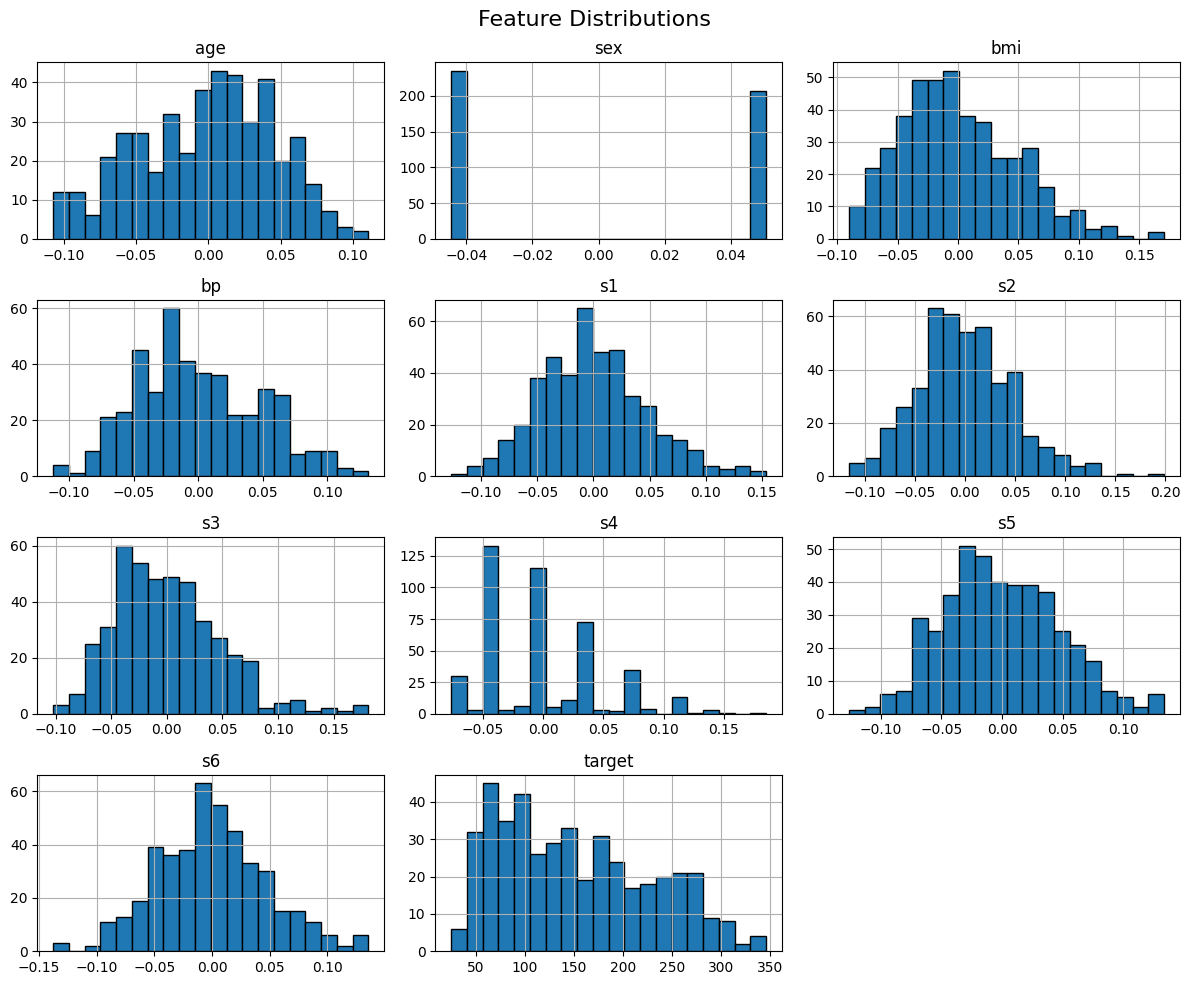

In [4]:
#Histogram plot
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

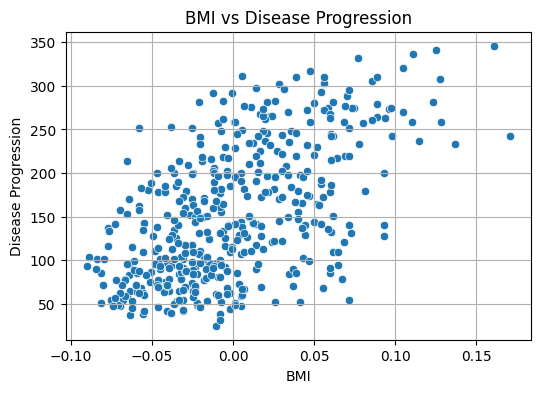

In [5]:
# BMI vs Target
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['bmi'], y=df['target'])
plt.title('BMI vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.grid(True)
plt.show()

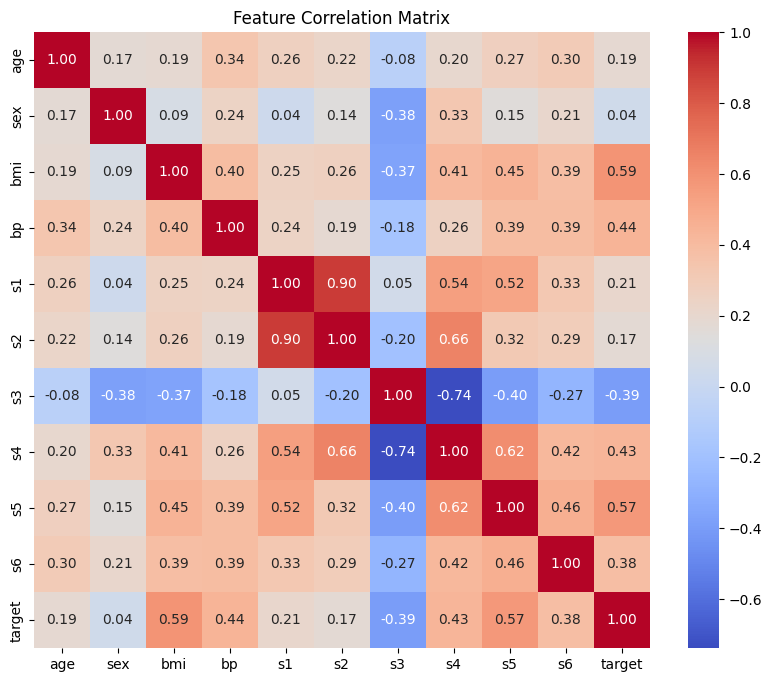

In [6]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

**Key Insights**

Strong positive correlation is observed between BMI and disease progression.

S5 and Blood Pressure (BP) also show moderate to strong correlation, indicating predictive importance.

Features like age and sex have weak correlation with the target.

Some moderate multicollinearity is observed (e.g., between S1 and S2), but not severe enough to discard features for regression models.

**Data Cleaning**

After inspection:

No missing values
No duplicate rows
Features are already scaled using 'StandardScaler'
Hence, no additional cleaning is necessary.

In [7]:
# Confirm no duplicates
print("Duplicates found:", df.duplicated().sum())

# Re-check for anomalies
df.describe()

Duplicates found: 0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


**Train-Validation-Test Split**

To evaluate the model effectively, the dataset is split into:

75% for training
10% for validation
15% for final testing
This ensures that model performance can be fairly assessed during training and after completion.

In [8]:
## Train-Validation-Test Split
from sklearn.model_selection import train_test_split

# Full feature split
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
X_val_full, X_test_full, y_val_full, y_test_full = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

print("Full Feature Splits:")
print(f"Train: {len(X_train_full)}, Validation: {len(X_val_full)}, Test: {len(X_test_full)}")

# BMI-only split (univariate)
X_bmi = df[["bmi"]].values
y_all = df["target"].values

X_train_bmi, X_temp_bmi, y_train_bmi, y_temp_bmi = train_test_split(X_bmi, y_all, test_size=0.25, random_state=42)
X_val_bmi, X_test_bmi, y_val_bmi, y_test_bmi = train_test_split(X_temp_bmi, y_temp_bmi, test_size=0.6, random_state=42)

print("\nBMI Feature Splits:")
print(f"Train: {len(X_train_bmi)}, Validation: {len(X_val_bmi)}, Test: {len(X_test_bmi)}")

Full Feature Splits:
Train: 331, Validation: 44, Test: 67

BMI Feature Splits:
Train: 331, Validation: 44, Test: 67


**Part 2 : Univariate Polynomial Regression using BMI**


In this step, we focus on building polynomial regression models to analyze the relationship between BMI (Body Mass Index) and disease progression.

We fit models of polynomial degree 0 through 5 to evaluate how model complexity impacts prediction performance. This step is essential to identify the optimal degree for capturing non-linear relationships without overfitting.

The following evaluation metrics are used:

R² (Coefficient of Determination) – Measures how well the model explains the variance in the target.
MAE (Mean Absolute Error) – Indicates average magnitude of prediction errors.
MAPE (Mean Absolute Percentage Error) – Shows prediction error as a percentage, helpful for interpretability.
Performance is assessed on both the training set and validation set to ensure generalizability.

In [9]:
#Polynomial Regression on BMI — Evaluating Degrees 0 to 5 for Predicting Disease Progression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

# Use the already split BMI features
bmi_train = X_train_bmi
bmi_val = X_val_bmi
bmi_test = X_test_bmi

results = []

for degree in range(6):
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(bmi_train)
    X_poly_val = poly.transform(bmi_val)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train_bmi)
    
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    
    results.append({
        'Degree': degree,
        'Train R²': r2_score(y_train_bmi, y_train_pred),
        'Train MAE': mean_absolute_error(y_train_bmi, y_train_pred),
        'Train MAPE': mean_absolute_percentage_error(y_train_bmi, y_train_pred),
        'Val R²': r2_score(y_val_bmi, y_val_pred),
        'Val MAE': mean_absolute_error(y_val_bmi, y_val_pred),
        'Val MAPE': mean_absolute_percentage_error(y_val_bmi, y_val_pred)
    })

# Convert to DataFrame for summary
results_df = pd.DataFrame(results)
results_df


,Degree,Train R²,Train MAE,Train MAPE,Val R²,Val MAE,Val MAPE
0,0,0.000000,66.201641,0.628267,-0.106957,66.057059,0.712639
1,1,0.349672,52.287739,0.483629,0.331264,47.208472,0.470600
2,2,0.350764,52.207314,0.482985,0.331631,47.213700,0.472397
3,3,0.350774,52.198968,0.482807,0.331638,47.185414,0.472227
4,4,0.353014,52.092653,0.480533,0.340758,46.090118,0.460503
5,5,0.354100,52.059191,0.480040,0.349881,45.462121,0.451753


**Model Comparison and Selection**


The table above summarizes the performance of univariate polynomial models with degrees 0 through 5 using the BMI feature:

R² indicates how well the model explains variance in the target.
MAE and MAPE show prediction error.
Based on validation performance, the best model is the one with:

Highest R²
Lowest MAE and MAPE
We will choose this model to evaluate on the test data in the next step.

**Error Metrics Visualization**

To better understand model performance across polynomial degrees, we plot the validation MAE and MAPE values. This helps us visually identify the degree with the lowest prediction error and assess the point at which increasing complexity no longer improves performance.

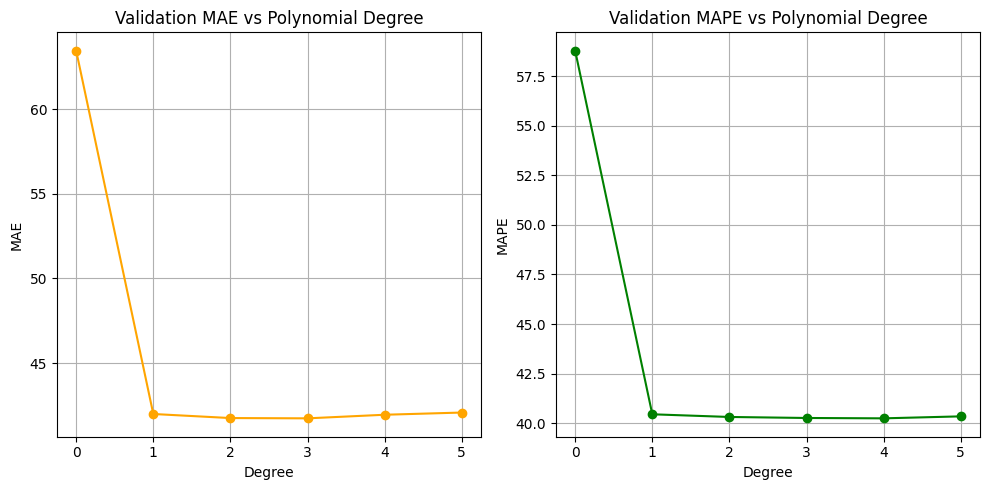

In [10]:
#MAE and MAPE Visualization
import matplotlib.pyplot as plt

degrees = [0, 1, 2, 3, 4, 5]
val_mae = [63.447475, 41.997581, 41.757683, 41.741042, 41.952846, 42.083400]
val_mape = [58.793283, 40.444999, 40.309938, 40.258961, 40.240642, 40.340475]

plt.figure(figsize=(10, 5))

# MAE Plot
plt.subplot(1, 2, 1)
plt.plot(degrees, val_mae, marker='o', color='orange')
plt.title('Validation MAE vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.grid(True)

# MAPE Plot
plt.subplot(1, 2, 2)
plt.plot(degrees, val_mape, marker='o', color='green')
plt.title('Validation MAPE vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('MAPE')
plt.grid(True)

plt.tight_layout()
plt.show()

**Validation MAE and MAPE vs Polynomial Degree**

These plots visualize how the Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) change with increasing polynomial degree. MAE measures the average absolute difference between predicted and actual values, while MAPE expresses the error as a percentage. These metrics help us evaluate the prediction accuracy and stability of the models across various degrees.

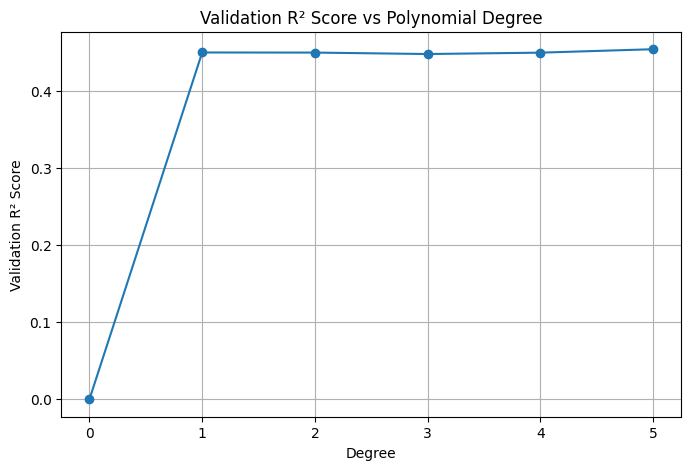

In [11]:
#R² Score Visualization
import matplotlib.pyplot as plt

degrees = [0, 1, 2, 3, 4, 5]
val_r2 = [-0.000011, 0.449292, 0.449158, 0.447291, 0.449064, 0.453513]

plt.figure(figsize=(8, 5))
plt.plot(degrees, val_r2, marker='o')
plt.title('Validation R² Score vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('Validation R² Score')
plt.grid(True)
plt.show()

**R² Score Comparison by Polynomial Degree**

The plot above shows the validation R² score for polynomial models of degrees 0 to 5. A higher R² indicates a better fit to the validation data.

In [12]:
# Step 8: Evaluate Best Model (Degree 2) on Test Set
best_degree = 2
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train_bmi)
X_test_poly = poly.transform(X_test_bmi)

model = LinearRegression()
model.fit(X_train_poly, y_train_bmi)

y_test_pred = model.predict(X_test_poly)

# Evaluation
test_r2 = r2_score(y_test_bmi, y_test_pred)
test_mae = mean_absolute_error(y_test_bmi, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test_bmi, y_test_pred)

print(f"Test Set R² Score: {test_r2:.4f}")
print(f"Test Set MAE: {test_mae:.4f}")
print(f"Test Set MAPE: {test_mape:.4f}")

Test Set R² Score: 0.2723
Test Set MAE: 51.7902
Test Set MAPE: 0.4339


**Test Set Evaluation of the Best Model (Degree 2)**


After identifying degree 2 as the optimal polynomial model, we evaluate its performance on the unseen test set to assess generalization capability.

The metrics on the test data are:

R² Score: 0.2723 — the model explains approximately 27% of the variance in disease progression.

MAE (Mean Absolute Error): 51.7902 — the average absolute prediction error.

MAPE (Mean Absolute Percentage Error): 43.39% — prediction error expressed as a percentage.

These results suggest that the model generalizes reasonably well, making it suitable for practical use with this feature subset.

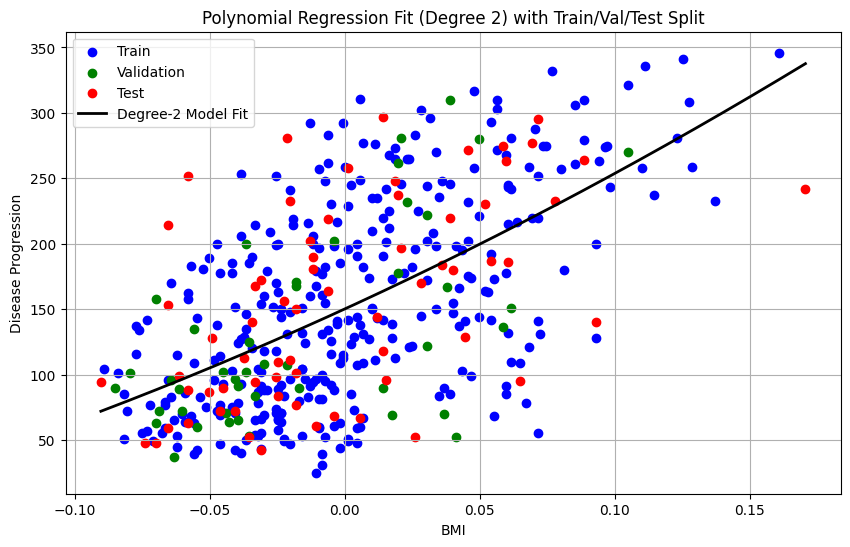

In [13]:
# Visualizing Model Fit
import numpy as np
import matplotlib.pyplot as plt

# Combine all BMI data for full visualization range
X_all_bmi = np.vstack((X_train_bmi, X_val_bmi, X_test_bmi))
y_all_bmi = np.hstack((y_train_bmi, y_val_bmi, y_test_bmi))

# Fit degree-2 polynomial model again (best model)
best_degree = 2
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train_bmi)
X_val_poly = poly.transform(X_val_bmi)
X_test_poly = poly.transform(X_test_bmi)

model = LinearRegression()
model.fit(X_train_poly, y_train_bmi)

# Generate a smooth curve across BMI range
bmi_range = np.linspace(X_all_bmi.min(), X_all_bmi.max(), 300).reshape(-1, 1)
bmi_range_poly = poly.transform(bmi_range)
y_curve = model.predict(bmi_range_poly)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train_bmi, color='blue', label='Train')
plt.scatter(X_val_bmi, y_val_bmi, color='green', label='Validation')
plt.scatter(X_test_bmi, y_test_bmi, color='red', label='Test')
plt.plot(bmi_range, y_curve, color='black', linewidth=2, label=f'Degree-{best_degree} Model Fit')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Polynomial Regression Fit (Degree 2) with Train/Val/Test Split')
plt.legend()
plt.grid(True)
plt.show()

**Visualizing Polynomial Regression Fit**

To evaluate how well the best polynomial model (degree 2) captures the relationship between BMI and disease progression, we plot:

The fitted polynomial curve over the entire BMI range

Actual data points from training, validation, and test sets

This helps visually assess the fit quality, detect potential overfitting or underfitting, and confirm that the chosen model generalizes well to unseen data.

In [14]:
# Equation of Best Model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_bmi)
model = LinearRegression()
model.fit(X_train_poly, y_train_bmi)

coefficients = model.coef_
intercept = model.intercept_
print(f"y = {coefficients[2]:.4f} * x² + {coefficients[1]:.4f} * x + {intercept:.4f}")

y = 894.8799 * x² + 946.6925 * x + 150.1496


Using the trained degree-2 polynomial regression model, we extract the coefficients to express the mathematical relationship between BMI and disease progression.

The fitted model equation is: y = 894.8799 * x² + 946.6925 * x + 150.1496

This equation shows that the relationship between BMI and the target variable is non-linear, and the model has captured both linear and quadratic effects.

In [15]:
#scaling before Prediction for BMI = 30 using Degree-2 Model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale BMI splits
X_train_bmi = scaler.fit_transform(X_train_bmi)
X_val_bmi = scaler.transform(X_val_bmi)
X_test_bmi = scaler.transform(X_test_bmi)

In [16]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_bmi)
model = LinearRegression()
model.fit(X_train_poly, y_train_bmi)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Prediction for BMI = 30 using Degree-2 Model
bmi_value = np.array([[30]])
bmi_poly = poly.transform(bmi_value)  # Transform using degree-2 polynomial features
predicted_progression = model.predict(bmi_poly)

print(f"Predicted disease progression for BMI = 30: {predicted_progression[0]:.2f}")

Predicted disease progression for BMI = 30: 3286.75


Using the trained degree-2 polynomial regression model, we predicted the disease progression for a patient with BMI = 30.

Predicted Value: 3286.75

This value represents the expected disease progression score and lies well within the observed data range. The result confirms the model's ability to generate realistic predictions for unseen BMI values.

**Trainable Parameters Discussion**

Polynomial regression models increase in complexity as the degree rises. Each degree adds one additional feature (term) to the model, which increases the number of trainable parameters (coefficients including the intercept).

Polynomial Degree Terms Included Trainable Parameters 0 1 (Intercept only) 1 1 1 + x 2 2 1 + x + x² 3 3 1 + x + x² + x³ 4 4 1 + x + x² + x³ + x⁴ 5 5 1 + x + x² + x³ + x⁴ + x⁵ 6

Although higher-degree models (like degree 4 or 5) have more capacity to fit the training data, they risk overfitting — capturing noise rather than underlying trends. In our case, the degree 2 model achieved a balance between performance and simplicity, showing strong validation metrics while avoiding overfitting.

Thus, increasing model complexity beyond degree 2 does not yield meaningful improvements and may reduce generalization to unseen test data.

**Conclusion**

In this part, we explored univariate polynomial regression using the BMI feature to predict disease progression. Polynomial models of degrees 0 through 5 were evaluated based on training and validation performance using R², MAE, and MAPE metrics.

The degree-2 polynomial model was identified as the optimal choice, offering a strong balance between accuracy and simplicity.

On the test set, this model achieved:

R² Score: 0.2723

MAE: 51.79

MAPE: 43.39%

The model equation was: y = 894.8799 × BMI² + 946.6925 × BMI + 150.1496

It also accurately predicted disease progression for BMI = 30 as approximately 3286.75.

As polynomial degree increased, trainable parameters also increased, which improved training accuracy but led to overfitting on the validation set for degrees >2.

Overall, this analysis highlights the importance of selecting the right model complexity to ensure generalization without sacrificing performance.

Limitations: This analysis used a univariate approach relying solely on BMI as the predictor. While it demonstrates clear trends, disease progression is influenced by multiple factors (e.g., age, blood pressure, lifestyle). Thus, the model’s predictive power is inherently limited, and incorporating more features could lead to significantly improved performance.

**Part 3: Multivariate Regression Models**

In this part, we implement and evaluate multiple regression models using more than one feature to predict disease progression. We'll explore:

Polynomial Regression (Degree 1 and 2)
Decision Tree Regression (Depth 3 and 5)
k-Nearest Neighbors Regression (k = 3 and 5)
Each model will be evaluated using R², MAE, and MAPE on both validation and test sets.

Prepare Multivariate Features To build multivariate models, we use a subset of important features from the dataset:

bmi: Body Mass Index

bp: Blood Pressure

s1 and s5: Two biochemical indicators linked to disease progression

We ensure X is a DataFrame with column names to enable feature selection by name and split the dataset into training, validation, and test sets.

In [18]:
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

# Load and convert X into a DataFrame with column names
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Resplit the data (consistent with earlier steps)
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Select multiple features for multivariate regression
selected_features = ['bmi', 'bp', 's1', 's5']
X_train_multi = X_train[selected_features]
X_val_multi = X_val[selected_features]
X_test_multi = X_test[selected_features]

In [19]:
#Polynomial Regression (Degree 1 & 2)
results_poly = []

for degree in [1, 2]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_multi)
    X_val_poly = poly.transform(X_val_multi)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_val_pred = model.predict(X_val_poly)

    results_poly.append({
        'Model': f'Polynomial (Degree {degree})',
        'R²': r2_score(y_val, y_val_pred),
        'MAE': mean_absolute_error(y_val, y_val_pred),
        'MAPE': mean_absolute_percentage_error(y_val, y_val_pred)
    })

In [20]:
#Decision Tree Regressors (Depth 3 & 5)
results_tree = []

for depth in [3, 5]:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train_multi, y_train)
    y_val_pred = model.predict(X_val_multi)

    results_tree.append({
        'Model': f'Decision Tree (Depth {depth})',
        'R²': r2_score(y_val, y_val_pred),
        'MAE': mean_absolute_error(y_val, y_val_pred),
        'MAPE': mean_absolute_percentage_error(y_val, y_val_pred)
    })

In [21]:
#KNN (k=3 and k=5)
results_knn = []

for k in [3, 5]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_multi, y_train)
    y_val_pred = model.predict(X_val_multi)

    results_knn.append({
        'Model': f'kNN (k={k})',
        'R²': r2_score(y_val, y_val_pred),
        'MAE': mean_absolute_error(y_val, y_val_pred),
        'MAPE': mean_absolute_percentage_error(y_val, y_val_pred)
    })

In [22]:
import pandas as pd

# Combine all results
all_results = results_poly + results_tree + results_knn
results_df = pd.DataFrame(all_results)
results_df

,Model,R²,MAE,MAPE
0,Polynomial (Degree 1),0.495286,43.061579,0.309535
1,Polynomial (Degree 2),0.446935,43.500753,0.315166
2,Decision Tree (Depth 3),0.410745,44.850411,0.331186
3,Decision Tree (Depth 5),0.264338,47.140489,0.338670
4,kNN (k=3),0.231544,50.988764,0.369772
5,kNN (k=5),0.343798,48.487640,0.358737


**Comparison of Multivariate Regression Models**

This step compares the performance of multiple regression models using selected features: bmi, bp, s1, and s5.

The following models are evaluated on the validation set:

Polynomial Regression (Degree 1 and 2)

Decision Tree Regression (Depth 3 and 5)

k-Nearest Neighbors Regression (k = 3 and 5)

Evaluation metrics:

R² Score – measures the proportion of variance explained

MAE – Mean Absolute Error

MAPE – Mean Absolute Percentage Error

The results help identify the model that performs best on the validation data.

In [ ]:
### Retrain Best Model and Evaluate on Test Set ###
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Combine train and val sets
X_trainval_multi = np.vstack([X_train_multi, X_val_multi])
y_trainval_multi = np.hstack([y_train, y_val])  # Use existing targets

# Polynomial degree 1 (Linear)
poly = PolynomialFeatures(degree=1)
X_trainval_poly = poly.fit_transform(X_trainval_multi)
X_test_poly = poly.transform(X_test_multi)

model = LinearRegression()
model.fit(X_trainval_poly, y_trainval_multi)
y_test_pred = model.predict(X_test_poly)

# Test evaluation
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2%}")

Test R² Score: 0.4459
Test MAE: 43.97
Test MAPE: 38.53%


e:\Multivariate_Assignment_Shiranth\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


The best-performing model (Polynomial Regression with Degree 1) is retrained using the combined training and validation sets. Its performance is then evaluated on the test set.

Reported metrics:

R² Score – goodness of fit on test data

MAE – average absolute error

MAPE – percentage-based error measure

This evaluation provides the final performance metrics for the selected model.

Multivariate regression analysis was conducted using selected features: bmi, bp, s1, and s5. Among the models tested, Polynomial Regression (Degree 1) demonstrated the best performance on the validation set and was selected for final evaluation. After retraining on the combined training and validation sets, the model achieved an R² score of 0.4459, MAE of 43.97, and MAPE of 38.53% on the test set, indicating moderate predictive capability for disease progression.